In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [291]:
# Cargar el data Frame y vemos datos
df = pd.read_csv("/Users/francoquintanilla/Documents/Jupyter/CSV/regmulti_peso.csv")
df.head()

,dia,peso,calorias,distancia,dia_s
0,1,85.20,-502,6.14,Sabado
1,2,85.20,-585,7.22,Domingo
2,3,85.70,-583,6.60,Lunes
3,4,85.90,-471,5.85,Martes
4,5,85.15,-378,4.55,Miercoles


In [292]:
# Data Frame para agregar nuevos datos 
df1 = pd.DataFrame({"dia":[81],
                    "peso":[77.65],
                    "calorias":[320],
                    "distancia":[5.71],
                    "dia_s":["Martes"]})

In [293]:
# Hacemos las calorias negativas
df1["calorias"] = df1["calorias"]*-1

In [294]:
# Concatenamos nuestros dfs
df = pd.concat([df, df1], ignore_index=True)

In [295]:
# Archivo en un CSV cuando ya los datos que meto aquí en python sean grandes
# df.to_csv('/Users/francoquintanilla/Documents/Jupyter/CSV/regmulti_peso1.csv', index=False)

In [296]:
# Checamos primeros datos
df.head()

,dia,peso,calorias,distancia,dia_s
0,1,85.20,-502,6.14,Sabado
1,2,85.20,-585,7.22,Domingo
2,3,85.70,-583,6.60,Lunes
3,4,85.90,-471,5.85,Martes
4,5,85.15,-378,4.55,Miercoles


In [297]:
# Ultimos datos
df.tail()

,dia,peso,calorias,distancia,dia_s
76,77,76.70,-314,5.56,Viernes
77,78,77.15,-226,3.90,Sabado
78,79,77.50,-168,3.15,Domingo
79,80,78.30,-221,3.81,Lunes
80,81,77.65,-320,5.71,Martes


In [298]:
# Tamaño de los datos
df.shape

(81, 5)

In [299]:
# Tipo de datos
df.dtypes

dia            int64
peso         float64
calorias       int64
distancia    float64
dia_s         object
dtype: object

In [300]:
# Limpiar mi data frame de los outliers (cuando corrí 10 km) osea solo upper
Q1 = np.percentile(df['distancia'], 25)
Q3 = np.percentile(df['distancia'], 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

In [301]:
# DataFrame nuevo sin outliers
df = df[df['distancia'] < upper]

In [302]:
# Caracteristicas estadisticas de los datos
df.describe()

,dia,peso,calorias,distancia
count,80.000000,80.000000,80.000000,80.000000
mean,41.375000,80.518062,-313.962500,4.612500
std,23.430141,2.426605,149.850934,1.851411
min,1.000000,76.700000,-639.000000,0.520000
25%,21.750000,78.668750,-410.250000,3.282500
50%,41.500000,79.925000,-317.000000,4.890000
75%,61.250000,82.472500,-207.500000,5.910000
max,81.000000,85.900000,-32.000000,7.910000


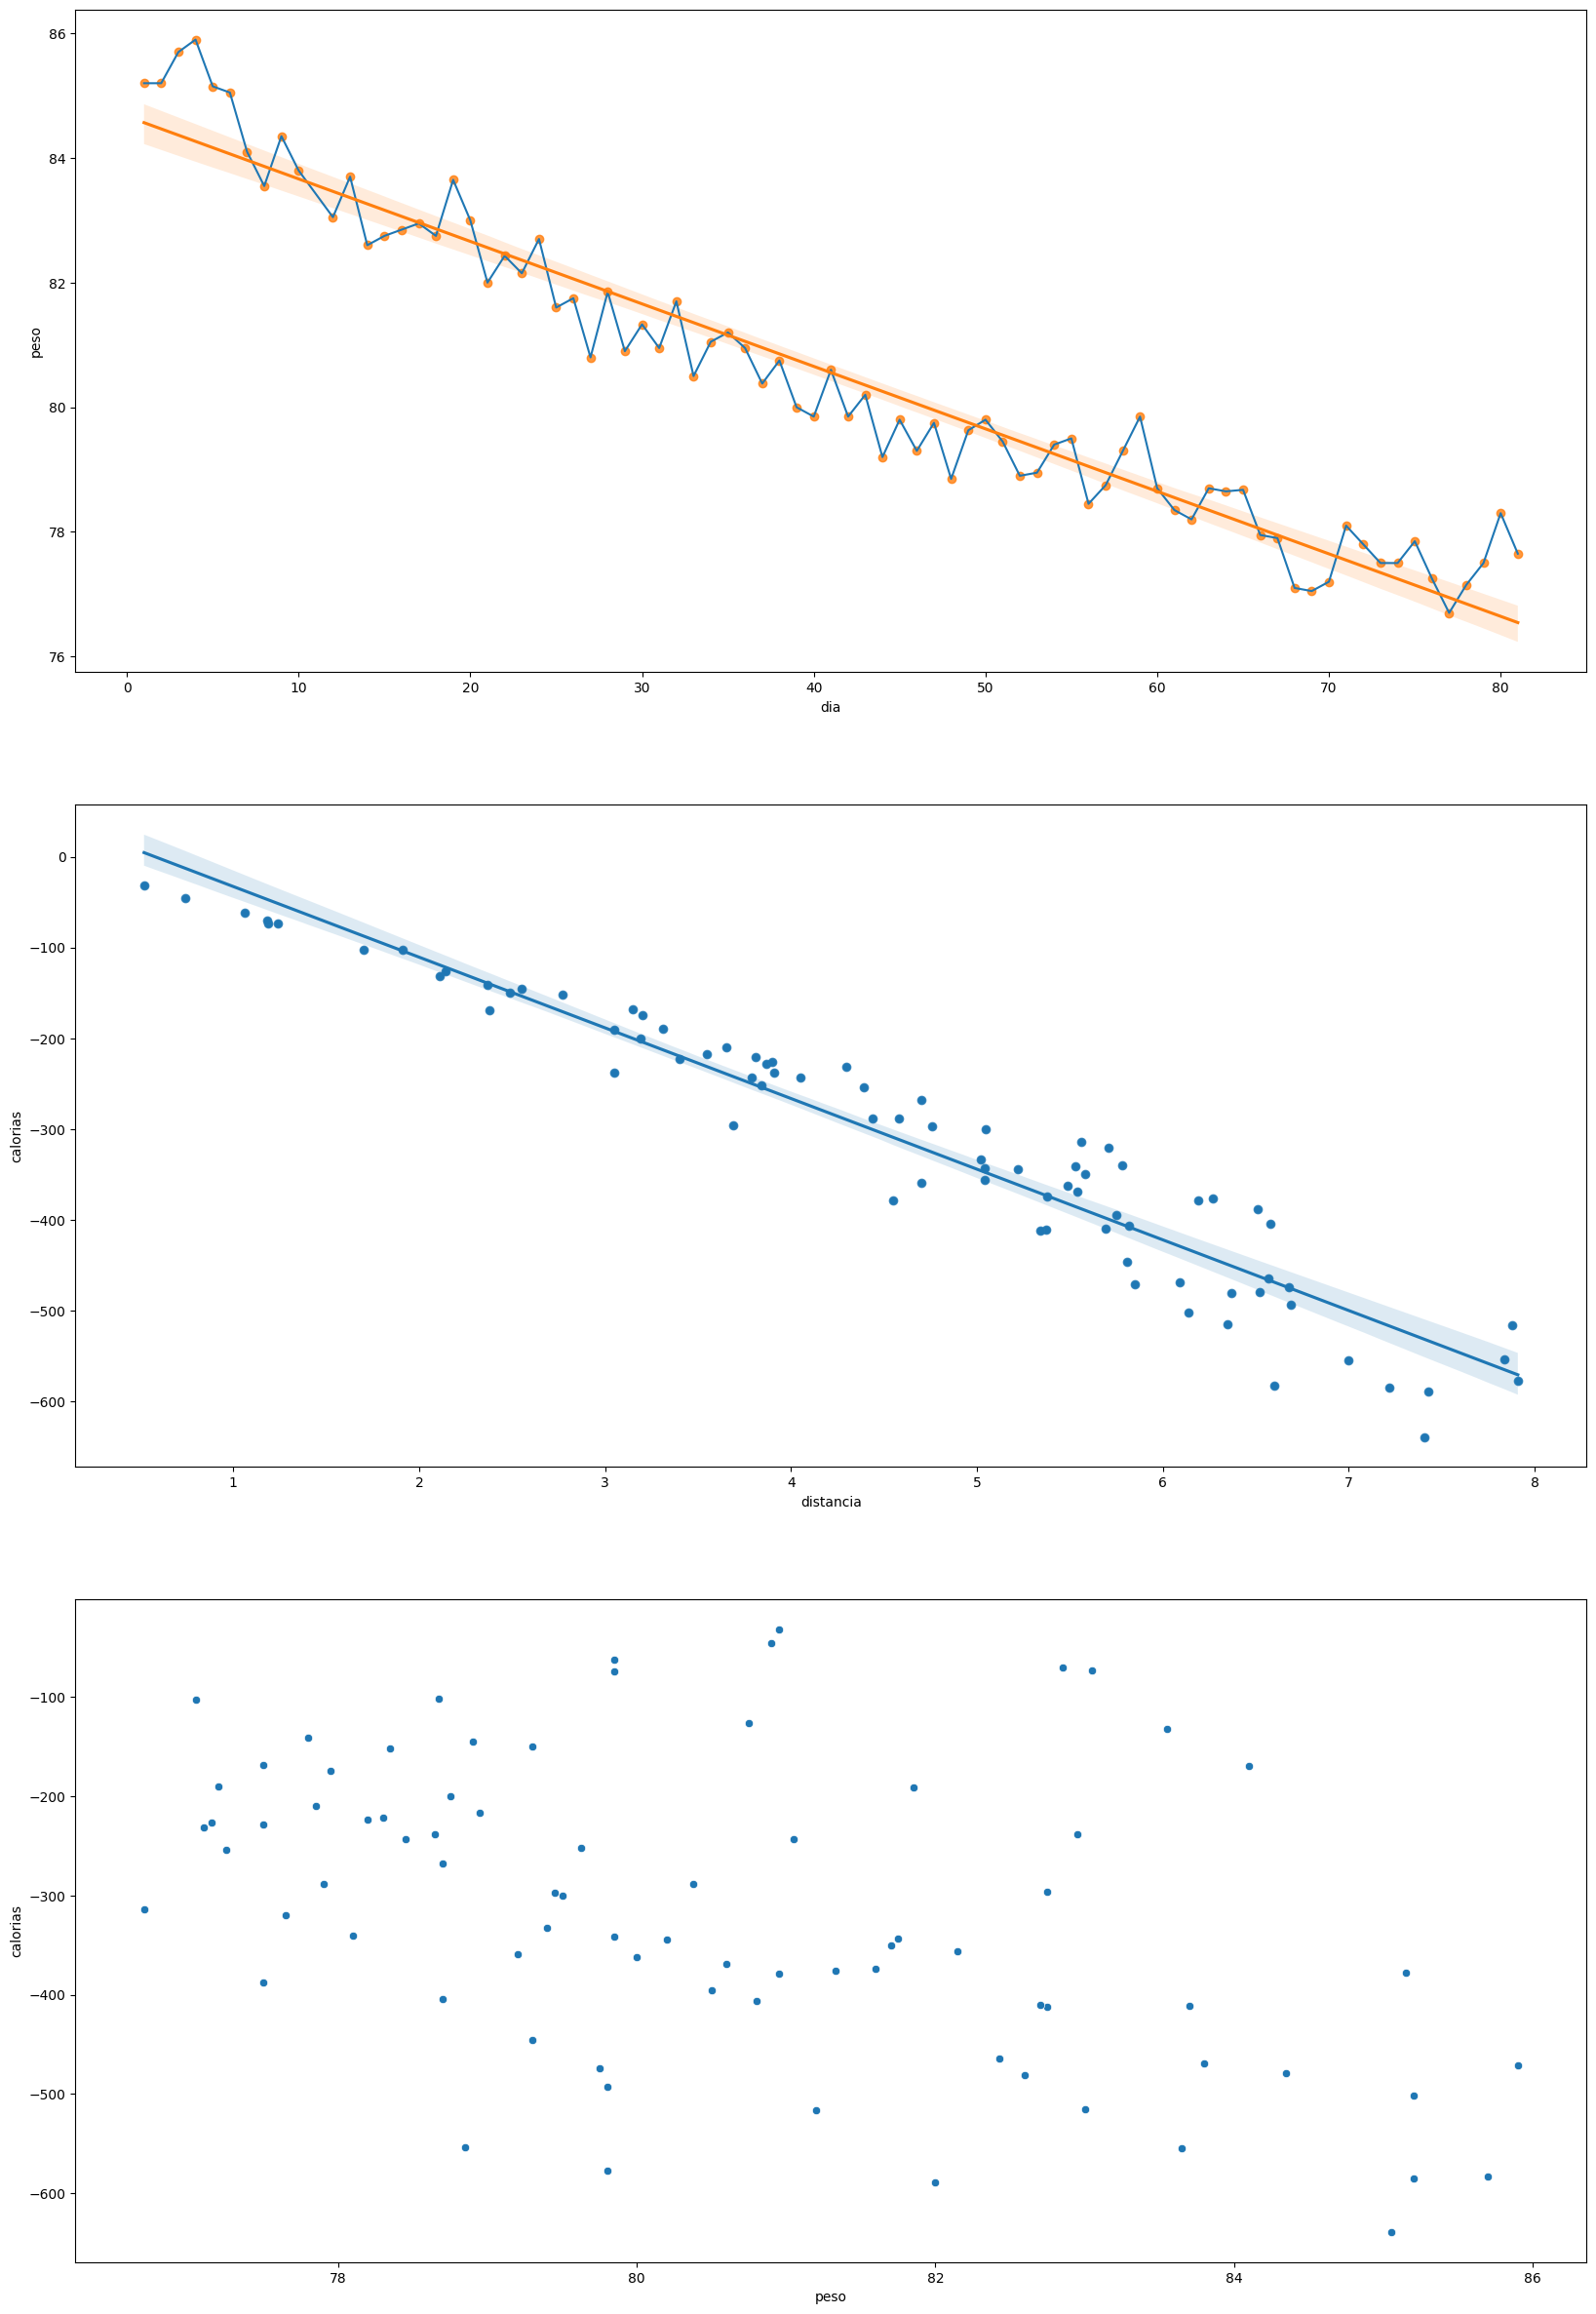

In [303]:
# Plot del peso vs los días transcurridos
fig, axes = plt.subplots(3, 1, figsize=(20,30))
sns.lineplot(x="dia", y="peso", data=df, ax=axes[0])
sns.regplot(x="dia", y="peso", data=df, ax=axes[0])
sns.scatterplot(y="calorias", x="distancia", data=df, ax=axes[1])
sns.regplot(y="calorias", x="distancia", data=df, ax=axes[1])
sns.scatterplot(y="calorias", x="peso", data=df, ax=axes[2])
plt.show()

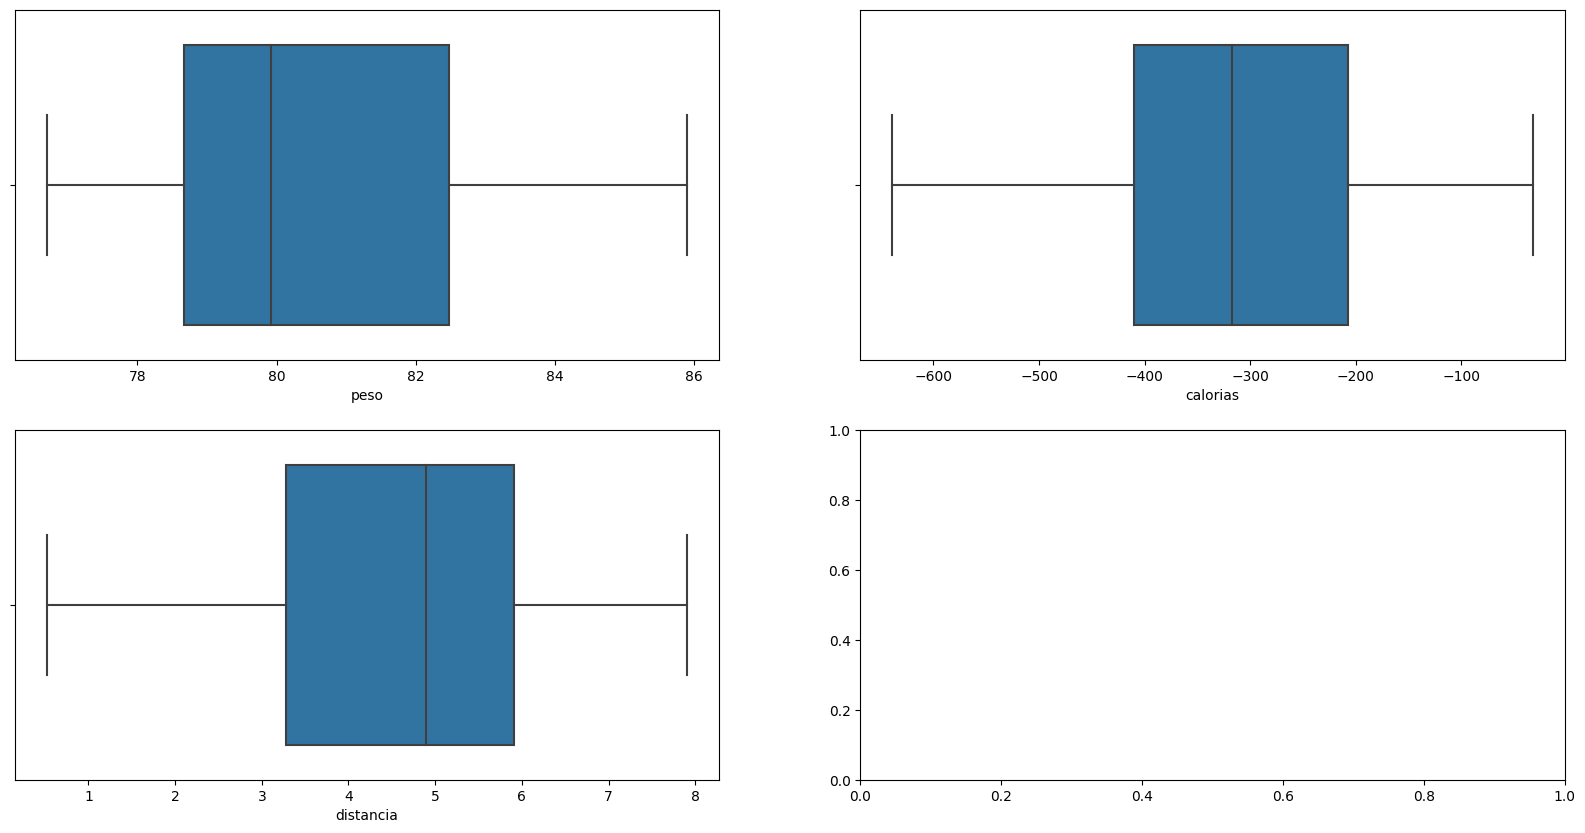

In [304]:
# Comportamiento de los quartiles de los datos
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x="peso", data=df, ax=axes[0, 0])
sns.boxplot(x="calorias", data=df, ax=axes[0, 1])
sns.boxplot(x="distancia", data=df, ax=axes[1, 0])
plt.show()

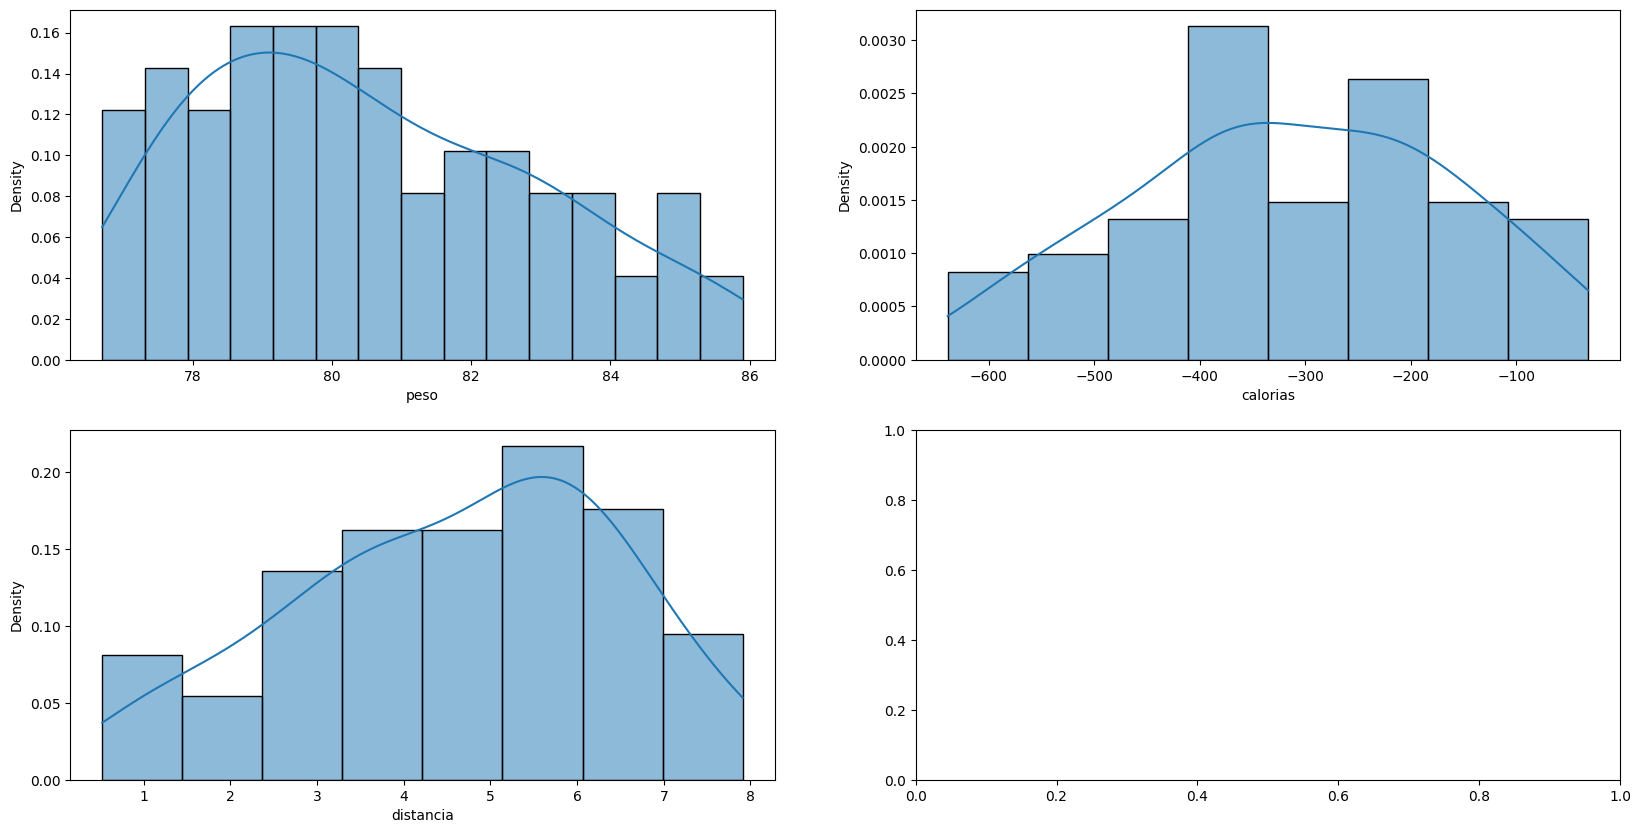

In [305]:
# Histograma del comportamiento del peso
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.histplot(x="peso", data=df, bins=15, kde=True, stat="density", ax=axes[0, 0])
sns.histplot(x="calorias", data=df, kde=True, stat="density", ax=axes[0, 1])
sns.histplot(x="distancia", data=df, kde=True, stat="density", ax=axes[1, 0])
plt.show()

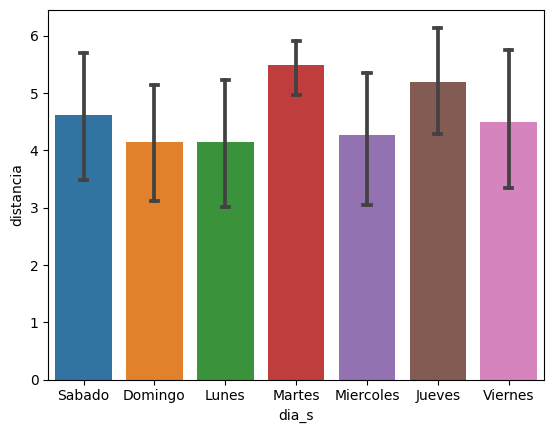

In [306]:
# Plot de la distancia en los días de la semana
sns.barplot(x="dia_s", y="distancia", data=df, capsize=0.1)
plt.show()

In [307]:
# Veré que día corrí los 10 km para ver el resultado anterior (distancia maxima)
df[df["distancia"] == df["distancia"].max()]

,dia,peso,calorias,distancia,dia_s
49,50,79.8,-577,7.91,Sabado


In [308]:
# Encontrar la media numerica de ese día
round(df[df["dia_s"] == "Martes"]["distancia"].mean(), 4)

5.4891

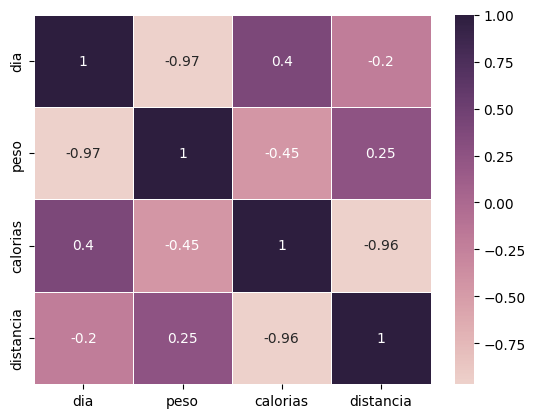

In [309]:
# Hacemos la matriz de correlación
sns.heatmap(df.corr(numeric_only=True), cmap=sns.cubehelix_palette(as_cmap=True),
            annot=True, linewidth=0.5)
plt.show()

Regresión Lineal

In [310]:
# Definimos variables del modelo con nuesta data
seed = 1800
testp = 0.25

# Nuestra variable objetivo, es decir, lo que buscamos
obj = df['peso']

# Eliminamos la variable objetivo como la categorica (no nos sirve regresión lineal)
train_df = df.drop(['peso', 'dia_s'], axis=1)

# Dividimos nuestro modelo con el data de entrenamiento con difrentes variables
X, X_test, y, y_test = \
train_test_split(train_df, obj, test_size=testp, random_state=seed)

In [311]:
# Iniciamos el modelo de regresion lineal con nuestros datos
model = LinearRegression().fit(X, y)

# Hacemos predicciones del modelo
pred = model.predict(X_test)

In [312]:
# Sacamos el accuracy del modelo
print("Accuracy Score:", round(model.score(X_test, y_test)*100, 4), "%")

Accuracy Score: 96.6292 %


In [313]:
# Checamos el error
mse = mean_squared_error(y_test, pred, squared=True)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f'Mean squared error: {mse:.4f}')
print(f'Root mean squared error: {rmse:.4f}')

Mean squared error: 0.2713
Root mean squared error: 0.5209


In [314]:
# Los coeficientes de la ecuación de regresión son:
print("b =", round(model.intercept_, 4))
print("m =", model.coef_)

b = 84.1844
m = [-0.09410251 -0.00210857 -0.10526157]


In [315]:
# Checamos los datos predichos vs los acutales en el test
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Predicted': pred.squeeze()})
df_preds = df_preds.sort_index()
print(df_preds)

     Real  Predicted
1   85.20  84.469750
2   85.70  84.436693
7   83.55  83.487840
12  83.70  83.262466
16  82.95  82.765480
18  83.65  82.829908
21  82.43  82.400983
23  82.70  82.191546
37  80.75  80.648956
39  79.85  80.439485
40  80.60  80.521141
57  79.30  78.780670
61  78.20  78.462397
62  78.70  78.326340
65  77.95  78.003720
67  77.10  77.819915
69  77.20  77.649468
73  77.50  77.353717
75  77.25  77.106119
78  77.50  76.772999


In [316]:
# Checamos los feature names para saber que poner de info
coefficients_df = pd.DataFrame(data=model.coef_, 
                              index=X.columns, 
                              columns=['Coefficient value'])
print(coefficients_df)

           Coefficient value
dia                -0.094103
calorias           -0.002109
distancia          -0.105262


In [317]:
# Por si queremos checar la predicción algún día en especifico
day = pd.DataFrame({'dia': 81, 'calorias': 0, 'distancia': 0}, index=[0])
print(model.predict(day).squeeze())

76.56212824931947


In [318]:
# Función que nos ayuda a agregar la media de los datos faltantes
# df['peso'] = round(df["peso"].ffill().add(df["peso"].bfill()).div(2), 2)